In [1]:
#! conda install pytables

# Libraries and Versions
Like always we will import some of the libraries and verify their version

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,classification_report, accuracy_score,
                             precision_score,recall_score,f1_score, roc_curve)

import platform

import random

In [3]:
#check versions of libraries and system
print("python |pandas |numpy |seaborn|")
print("-------|-------|------|-------|")
print(f"{platform.python_version()}  |{pd.__version__} |{np.__version__}|{sns.__version__}  |")




python |pandas |numpy |seaborn|
-------|-------|------|-------|
3.7.2  |0.24.2 |1.16.2|0.9.0  |


# Third Assignment - Introduction

* In this assignment you will become familiar with scikit-learn, which is one of the most widely used analysis modeling python libraries. 
* At the same time I will provide a description of the data that we have been looking at.
* The goal of this assignment is to apply logistic regression on our data to see if we can predict default based on the data we have. 
* For a summary of scikit-learn, read the section titled **scikit-learn Overview**
* For a summary of the data, read the section title **Data and Default Modeling**
* To move on to the exercise portion, go to the section three **Implementation** and follow the instructions. 

# Section One: scikit-learn Overview

* Over the last two classes we focused on data ingestion, data representation, visualization and touched on package management
* We will now focus on analysis and modeling

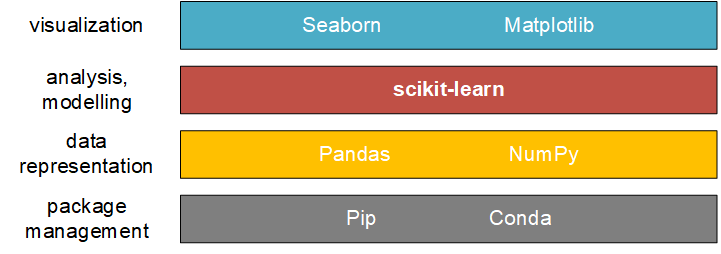

* All scikit-learn estimators are based on the **sklearn.base.BaseEstimator** and have the following properties: 
    * At *initialization* the model receives all the *hyperparameters* for the model. Hyperparameters are parameters that **don't depend on the data**
    * The *fit()* method constructs the model.
* Classification and regression models require a *predict()* method
    * *Modelparameter*, which are **data dependent** are determined during the *fit()* procedure
    * Calling *predict()* executes the methods and determines the "best" labels
    * Below is an overview of hyperparameter and model parameters for some of the estimators

In [4]:
key=["Type", "Hyperparameters","Model Parameters"]
values=[["Data dependence", "Initialization location","Naming convention","Examples"],
        ["No", "__init__()","same as argument name","n_neighbors, algorithm, n_jobs"],
       ["Yes","fit()","ends with an underscore","classes_,theta_,sigma_"]]
pd.DataFrame(dict(zip(key,values))).set_index("Type")

,Hyperparameters,Model Parameters
Type,,
Data dependence,No,Yes
Initialization location,__init__(),fit()
Naming convention,same as argument name,ends with an underscore
Examples,"n_neighbors, algorithm, n_jobs","classes_,theta_,sigma_"


In [5]:
key=["scikit-learn module","classifier name","main hyperparameters"]
values=[["ensemble", "linear_model","neighbors", "tree"],
       ["RandomForestClassifier","LogisticRegression","KNeighborsClassifier", "DecisionTreeClassifier"],
       ["n_estimators, max_depth","penalty, C","n_neighbors, weights","max_depth"]]
pd.DataFrame(dict(zip(key,values))).set_index("scikit-learn module")

,classifier name,main hyperparameters
scikit-learn module,,
ensemble,RandomForestClassifier,"n_estimators, max_depth"
linear_model,LogisticRegression,"penalty, C"
neighbors,KNeighborsClassifier,"n_neighbors, weights"
tree,DecisionTreeClassifier,max_depth


In [6]:
key=["scikit-learn module","regressor name","main hyperparameters"]
values=[["ensemble", "linear_model"],
       ["RandomForestRegressor","LinearRegression"],
       ["n_estimators, max_depth","fit_intercept"]]
pd.DataFrame(dict(zip(key,values))).set_index("scikit-learn module")

,regressor name,main hyperparameters
scikit-learn module,,
ensemble,RandomForestRegressor,"n_estimators, max_depth"
linear_model,LinearRegression,fit_intercept


In [7]:
key=["module", "transformer name","main hyperparameters"]
values=[["decomposition","preprocessing","preprocessing","preprocessing","preprocessing","preprocessing","preprocessing"],
       ["PCA","Imputer","MinMaxScaler","OneHotEncoder","QuantileTransformer","RobustScaler","StandardScaler"],
       ["n_components","missing_values, strategy","feature_range","categorical_features","n_quantiles, output distribution",
       "with_centering, with_scaling","with_mean, with_std"]]
pd.DataFrame(dict(zip(key,values))).set_index("module")

,transformer name,main hyperparameters
module,,
decomposition,PCA,n_components
preprocessing,Imputer,"missing_values, strategy"
preprocessing,MinMaxScaler,feature_range
preprocessing,OneHotEncoder,categorical_features
preprocessing,QuantileTransformer,"n_quantiles, output distribution"
preprocessing,RobustScaler,"with_centering, with_scaling"
preprocessing,StandardScaler,"with_mean, with_std"


*For a full documentation on the classes please see* [https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#]

## Model Validation

For model validation the following page provides a good overview: [https://scikit-learn.org/stable/modules/model_evaluation.html]

If we focus on binary classification (e.g., default or non-default) we get the following table:

In [8]:
key=["Actual", "Predicted Neg", "Predicted Pos"]
values=[["Actual: Neg", "Actual: Pos"],
       ["True Negatives (tn)","False Negatives (fn)"],
       ["False Positives (fp)","True Positives (tp)"]]
pd.DataFrame(dict(zip(key,values))).set_index("Actual")

,Predicted Neg,Predicted Pos
Actual,,
Actual: Neg,True Negatives (tn),False Positives (fp)
Actual: Pos,False Negatives (fn),True Positives (tp)


Based on this we can define:
$$\text{Accuracy}:={{tn+tp}\over{tn+fn+fp+tp}}\text{: the percentage of labels predicted correctly} \$$

$$\text{Precision}:={{tp}\over{tp+fp}}\text{: the percentage of predicted positives that are actually correct}\$$

$$\text{Recall}:={{tp}\over{tp+fn}}\text{: the percentage of actual positives that are predicted correctly} \$$

$$F_\beta \text{ measure}:=(1+\beta^2){{\text{precision} \times \text{recall}} \over {{\beta^2\text{precision}+\text{recall}}}}={{(1+\beta^2)tp} \over {(1+\beta^2)tp+fp+\beta^2fn}}$$

For $\beta<1$ precision is weighted more than recall, for $\beta>1$ recall has higher weight and for $\beta=1$ is the $F_1$ score which weights recall and precision equally.

The metrics are implemented in **sklearn.metrics** [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics] and common metrics are 
* **sklearn.metrics.confusion_matrix** [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html]
* **sklearn.metrics.classification_report** [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report]
* Some of the other metrics are 
    * sklearn.metrics.accuracy_score
    * sklearn.metrics.auc
    * sklearn.metrics.f1_score
    * sklearn.metrics.fbeta_score
    * sklearn.metrics.precision_score
    * sklearn.metrics.recall_score

# Section Two: Data and Default Modeling

* The data we used in Assignment 1 and Assigment 2 covers quarterly call reports submitted to FDIC.
* **What are call reports?**

## Call Reports

* **Call reports**(Consolidated Report of Condition and Income) are filed **quarterly** by all commercial banks in the US and are made **publicly available**
* In addition FDIC provides historical data for failed banks at [https://www.fdic.gov/bank/individual/failed]

* The call reports consist of 29 schedules in total. 
* The data we are looking at is from the following schedules
    * RI - Income statement
    * RI-A - Changes in bank equity capital
    * RC - Balance sheet
    * RC-C, Part I - Loans and leases
    * RC-C, Part II - Loans to small businesses and small farms
    * RC-I - Assets and liabilities of IBFs (FFIEC 031 only)
    * RC-K - Quarterly averages
    * RC-N - Past due and non-accrual loans, leases and other assets

* **Why is it interesting  to look at FDIC Call Reports**
    * FDIC uses an internal (non-public) rating system to charge premium for providing deposit insurance to banks. 
    * To learn more about the risk based assessment of institutions please see [https://www.fdic.gov/deposit/insurance/assessments/risk.html]

## Corporate Defaults vs Bank Failures

* Most of you might be familiar with corporate defaults using structural models (Merton Model). Below is a comparison between corporate defaults and bank failures

* **Similarities**:
    * Both are about predictions of rare **binary events**
    * Both use similar predictors (asset/debt and other financial ratios)
    * Both involve analyzing high-dimensional sequences
    * Both can rely on either purely statistical approaches, or on analysis of decision-making processes
* **Differences**:
    * Corporations deal with production of goods (COGS etc not used for banks)
    * Banks have a much richer debt structure and more specialized financial assets
    * Corporations file for bankruptcy while banks are taken over by the FDIC

## Commonly used Financial Variables

* Commonly used financial variables used to predict default include:
    * Liquidity ratio
    * Debt ratio
    * Profitability ratio
    * Value ratio
    * Efficiency ratio
* There are many more...

* The most common cause of a bank closure is capital inadequacy. 
* However, the FDIC may decide to close a bank due to other reasons.

## Data Set

* The data for this analysis is limited to smaller entities and is scaled
* For the logistic regression we will look only on specific columns. 

* Data: ailed/assisted banks with at least 2Y of history for FDIC call reports, plus non-failed banks
* Entity Features: 
    * **Log_TA**: logarithm of total asset for a bank
    * **NI_to_TA** : net income to total assets
    * **Equity_to_TA**: equity to total assets
    * **NPL_to_TL**: non performing loans to total loans
    * **REO_to_TA** : return on equity to totat assets
    * **ALLL_to_TL** : allowance for loans and lease losses to total loans
    * **core_deposits_to_TA**: core deposits to total assets
    * **brokered_deposits_to_TA**: brokered deposits to total assets
    * **loss_provision_to_TL**: loss provision (represents management's estimate of potential lost revenue from bad loans) to total loans
    * **NIM** : net interest margin (net interest income / earnings assets)
    * **assets_growth** : growth in assets
* Market Economic Environment Features:
    * **term_spread**
    * **stock_mkt_growth**
    * **real_gdp_growth**
    * **unemployment_rate_change**
    * **treasury_yield_3m**
    * **bbb_spread**
    * **bbb_spread_change**

# Section Three: Implementation

## General Guidelines

* You have to provide your code in the cell below the command <font color='red'>**#ADD Your Code Here**</font>
* Provide your analysis below the command <font color='red'>**#ADD Your Commentary Here**</font>
* Before we do that, let's explore the data set that we will be using for our exercise.

## Import Data

* Read the file "data_third_assignment.h5" and set IDRSSD
* assign the data to the dataframe *df_fdic_small*

<font color='red'>#ADD Your Code Here (one-two lines)</font>


* We wrote a helper function in the last assignment to normalize columns headers
* We will now import this function and apply it to the dataframe
* Apply the function **normalize_df_columns** to the dataframe **df_fdic_small** and assign the values to **df_fdic_small.columns**

In [10]:
from helper_functions import normalize_df_columns

<font color='red'>#ADD Your Code Here (one line)</font>

Show the first five rows of the dataframe

<font color='red'>#ADD Your Code Here (one line)</font>

We will use the below columns for our analysis

In [11]:
main_company_columns=['log_ta','ni_to_ta','equity_to_ta','npl_to_tl','reo_to_ta','alll_to_tl',
                      'core_deposits_to_ta','brokered_deposits_to_ta','liquid_assets_to_ta',
                      'loss_provision_to_tl','nim','assets_growth']
main_market_columns=['term_spread','stock_mkt_growth','real_gdp_growth','unemployment_rate_change',
                     'treasury_yield_3m','bbb_spread','bbb_spread_change']


## Defaulted and Non-Defaulted IDs

* As a first step we need to separate the data for entities that defaulted and entities that didn't default in our dataset

* Create a **list** of all entities that defaulted, i.e. **defaulter** is 1
    * Save the list as **defaulted_ids**
* Create a **list** of all entities that didn't default, i.e. **defaulter** is 0
    * Save the list as **non_defaulted_ids**
* Next create two new dataframes one for defaulted and for non-defaulted

<font color='red'>#ADD Your Code Here (four lines)</font>

## Assignment Modules

The assignment consists of four parts
* **Part I**: We will use all the available data to run the logistic regression
* **Part II**: We will use a balanced version of the data to run logistic regression
* **Part III**: We will use the balanced data from Part II. However, we will use a smaller number of columns to run the logistic regression
* **Part IV**: Open-ended written response exercise related to the analysis

### Part 1 - Use all Data 

* We will first use all the available data to run the logistic regression.

* Split the defaulted and non-defaulted data separately into a training and test set
    * Randomly select 70% of the ids into training set and the non-selected ids into test set
    * To do the random sampling use the **sample** method from **random**
        * To determine the exact number use the **int** part of the **len(list)*70%**
    * Save the values into: **defaulted_train_ids, defaulted_test_ids, non_defaulted_train_ids, non_defaulted_test_ids**
    * To determine the ids for the test set, determine the difference between the original and training list
        * This can be done for example by converting the list first into a set or using list comprehension

<font color='red'>#ADD Your Code Here (four lines)</font>

* Use the above lists to create the training and test dataframes
* Combine the training and test dataframes using for example **append**
* Save the values in **df_train_X, df_test_X, df_train_Y, df_test_Y**

<font color='red'>#ADD Your Code Here (~8 lines)</font>

#### Build Model

* Initialize a **logistic regression** (called **log_all**) with the following parameters
    * penalty = 'l1'
    * tol=1e-6
    * C=1000.0
    * Specify **solver** for the logistic regression to be **liblinear**
* Fit the model to the training data and save it as **result_all**
* Store the predictions in **predictions_all**

<font color='red'>#ADD Your Code Here (3-5 lines)</font>

* Print the confusion matrix
* Print the classification report

<font color='red'>#ADD Your Code Here (2-3 lines)</font>

**Analyze the result and explain why we are not good at predicting defaulted entities?**

<font color='red'>**#ADD Your Commentary Here**</font>

### Part II - Balanced Set of Data

* We will again use **all the defaulted entities** for our model. 
* However, instead of using all the non-defaulted data for our model we will select a much smaller subset for our model
    * Determine the number of non-defaulted entities and save it in **number_of_defaulted_entities**
    * Select randomly the same number_of_defaulted_entities from the non-defaulted list; use again the **sample** method
        * store the ids in **non_defaulted_balanced_ids** and **print the number of non-defaulted IDs**
    * Create a new training and test data set with a 70/30 split like in **Part I** with **non_defaulted_balanced_ids** and the full set of defaulted entities
    * Store the values in **non_defaulted_train_balanced_ids, non_defaulted_test_balanced_ids**
    * Create new non-defaulted balanced training and test dataframes called: **non_defaulted_train_balanced and non_defaulted_test_balanced**
    * Create new training and test sets based on the balanced data called: **df_train_balanced_X, df_test_balanced_X, df_train_balanced_Y, df_test_balanced_Y**

<font color='red'>#ADD Your Code Here (2-3 lines)</font>

In [97]:
#Determine the number of defaulted entities and print it


The number of defaulted entities in the sample is 472


<font color='red'>#ADD Your Code Here (2-3 lines)</font>

In [99]:
#Select randomly a sample of non defaulted entities with the same size as the defaulted entities
#print the number of non defaulted entities


The number of non-defaulted entities in the balanced dataset is 472


<font color='red'>#ADD Your Code Here (~8 lines)</font>

In [102]:
#Create the training and test data sets like in Part I but using the limited non-defaulted IDs


#### Build Model

* Initialize a logisitic regression -- **log_balanced** same parameters as in **Part I**
* Fit the logistic regression to the new training data and assign it to **results_balanced**
* Save the predictions in **predictions_balanced**

<font color='red'>#ADD Your Code Here (3-5 lines)</font>

* Print the confusion matrix
* Print the classification report

<font color='red'>#ADD Your Code Here (2-3 lines)</font>

[[5456 1255]
 [1362 3484]]


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      6711
           1       0.74      0.72      0.73      4846

   micro avg       0.77      0.77      0.77     11557
   macro avg       0.77      0.77      0.77     11557
weighted avg       0.77      0.77      0.77     11557



**Compare the results of the balanced model vs. the non-balanced model we created in Part I. Identify at least two changes/differences.**

<font color='red'>**#ADD Your Commentary Here**</font>

### Part III - Use a Limited Number of Columns

* Use the data set selected in Part II
* However, select for the model a smaller subset of columns. 
* For the new model use only the following columns:

In [15]:
limited_columns=['log_ta', 'ni_to_ta','equity_to_ta', 'npl_to_tl','core_deposits_to_ta', 'brokered_deposits_to_ta', 
                 'liquid_assets_to_ta']+ ['term_spread','stock_mkt_growth']

* Create new training and test data based only on those columns
* save the **X** values in **df_train_balanced_lim_X, df_test_balanced_lim_X**

<font color='red'>#ADD Your Code Here (2 lines)</font>

* Similar to Part II initialize the model, fit model, predict the values
* Store the items in **log_balanced_lim, result_balanced_lim, predictions_balanced_lim**

<font color='red'>#ADD Your Code Here (3 lines)</font>

* Print the confusion matrix
* Print the classification report

<font color='red'>#ADD Your Code Here (2 lines)</font>

[[5407 1304]
 [1810 3036]]


              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6711
           1       0.70      0.63      0.66      4846

   micro avg       0.73      0.73      0.73     11557
   macro avg       0.72      0.72      0.72     11557
weighted avg       0.73      0.73      0.73     11557



**Compare the results to Part II?**

<font color='red'>**#ADD Your Commentary Here**</font>

### Part IV

* Could we use the standard train_test_split from sklearn.model_selection to achieve similar splits as manually done above? If so, how?

* In Assignment 1, we saw that the data contained duplicate columns. We labelled them "company_ratio_2" and "company_ratio_3". They are actually "ni_to_ta" and "roa". 
    * What would be the impact if we include both columns in our model?

* Why do we need to scale our data for the model?
* Should we scale market environment variables and company variables separately or together? What is the impact of each?

# References

1. Lars Buitinck, Gilles Louppe, Mathieu Blondel, Fabian Pedregosa, Andreas C. Muller, Olivier Grisel, Vlad Niculae, Peter Prettenhofer, Alexandre Gramfort, Jaques Grobler, Robert Layton, Jake Vanderplas,Arnaud Joly, Brian Holt, and Gael Varoquaux (2013): **API design for machine learning software: experiences from the scikit-learn project** [https://arxiv.org/pdf/1309.0238.pdf]
2. Merton (1974): **On the Pricing of Corporate Debt: The Risk Structure of Interest Rates** (online available at JSTOR)
3.  Paco Nathan (2019): **A landscape diagram for Python data**[https://community.ibm.com/community/user/datascience/blogs/paco-nathan/2019/03/12/a-landscape-diagram-for-python-data]